# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [11]:
df = pd.read_csv('../data/labeled/customers_segmented.csv')

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [12]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

numerical = X.select_dtypes(include='number').columns
categorical = X.select_dtypes(include='object').columns

label_encoder = LabelEncoder()

for col in categorical:
    X[col] = label_encoder.fit_transform(X[col])

scaler = StandardScaler()

X[numerical] = scaler.fit_transform(X[numerical])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pada tahap ini, saya melakukan encoding data menggunakan `LabelEncoder` pada data-data kategorikal. Tujuannya agar data dapat dikenali oleh mesin nantinya. Saya juga melakukan standarisasi untuk data-data numerik.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [13]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

**K-Nearest Neighbors (KNN)** bekerja dengan mengklasifikasikan data berdasarkan label mayoritas dari tetangga terdekat dalam ruang fitur. Algoritma ini sederhana, tetapi sensitif terhadap jumlah tetangga (k) dan skala data.

**Decision Tree (DT)** membuat pohon keputusan dengan membagi data secara rekursif berdasarkan fitur yang memberikan informasi paling berguna. Algoritma ini mudah diinterpretasikan tetapi rentan terhadap overfitting jika pohonnya terlalu kompleks.

**Random Forest (RF)** adalah ensemble dari banyak pohon keputusan yang dilatih pada subset data. Dengan menggabungkan prediksi dari berbagai pohon, RF lebih stabil dan mengurangi risiko overfitting dibandingkan DT.

**Support Vector Machine (SVM)** menemukan hyperplane terbaik untuk memisahkan kelas data dengan margin terbesar. SVM efektif untuk data berdimensi tinggi tetapi sensitif terhadap parameter dan kernel yang digunakan.

**Naive Bayes (NB)** mengasumsikan independensi antar fitur dan menghitung probabilitas kelas berdasarkan distribusi data. Meski sederhana, NB sangat cepat dan efektif untuk data teks atau kategori.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

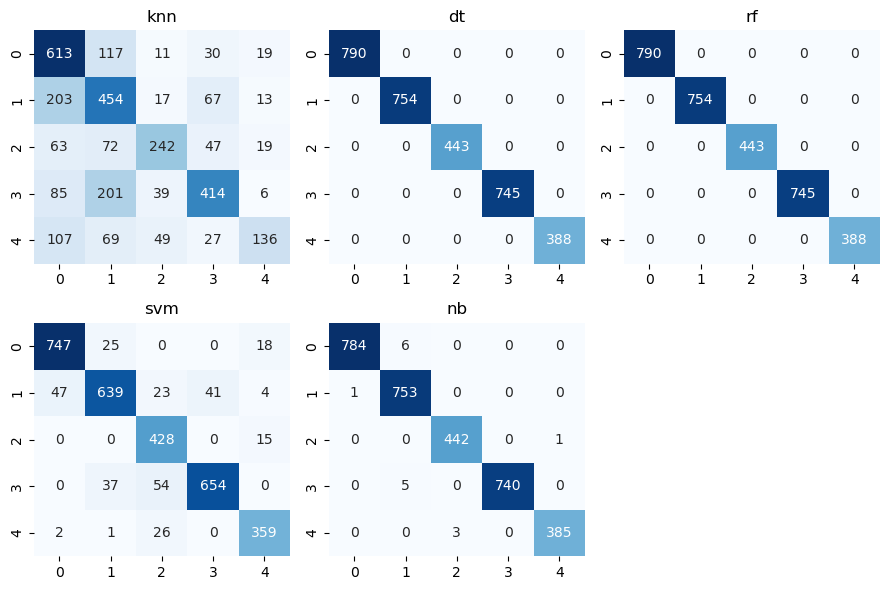

,Algorithm,Accuracy,Precision,Recall,F1
0,knn,0.595833,0.617692,0.595833,0.591112
1,dt,1.000000,1.000000,1.000000,1.000000
2,rf,1.000000,1.000000,1.000000,1.000000
3,svm,0.906090,0.909478,0.906090,0.906209
4,nb,0.994872,0.994919,0.994872,0.994878


In [34]:
y_train_pred_knn = knn.predict(X_train)
y_train_pred_dt = dt.predict(X_train)
y_train_pred_rf = rf.predict(X_train)
y_train_pred_svm = svm.predict(X_train)
y_train_pred_nb = nb.predict(X_train)

algorithms = ['knn', 'dt', 'rf', 'svm', 'nb']
result = []

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

for i, algorithm in enumerate(algorithms):
    y_pred = locals()[f'y_train_pred_{algorithm}']
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    
    cm = confusion_matrix(y_train, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(algorithm)
    result.append([algorithm, accuracy, precision, recall, f1])

fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()
result_train_df = pd.DataFrame(result, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1'])

result_train_df

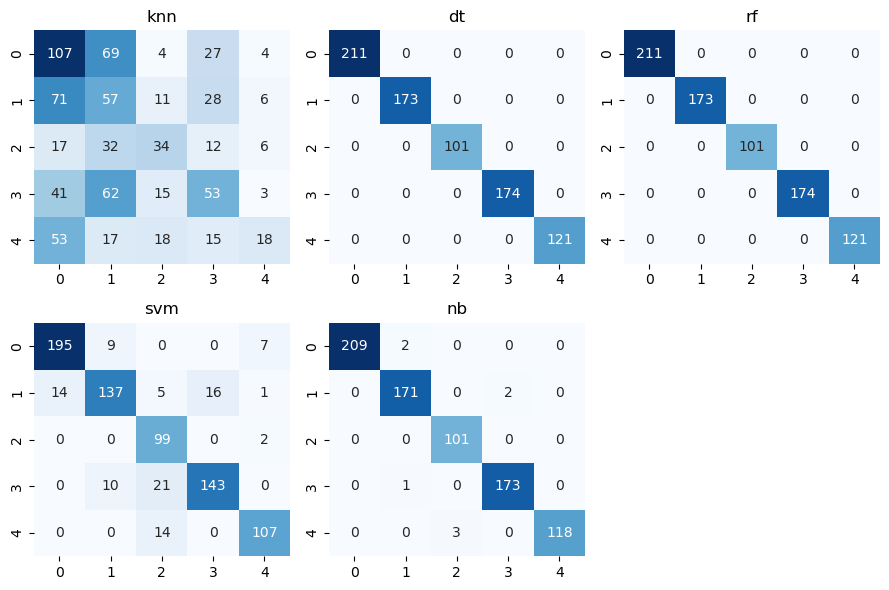

,Algorithm,Accuracy,Precision,Recall,F1
0,knn,0.344872,0.370234,0.344872,0.337435
1,dt,1.000000,1.000000,1.000000,1.000000
2,rf,1.000000,1.000000,1.000000,1.000000
3,svm,0.873077,0.881897,0.873077,0.873811
4,nb,0.989744,0.989891,0.989744,0.989756


In [35]:
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)

algorithms = ['knn', 'dt', 'rf', 'svm', 'nb']
result = []

fig, ax = plt.subplots(2, 3, figsize=(9, 6))

for i, algorithm in enumerate(algorithms):
    y_pred = locals()[f'y_pred_{algorithm}']
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(algorithm)
    result.append([algorithm, accuracy, precision, recall, f1])

fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

result_test_df = pd.DataFrame(result, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1'])

result_test_df

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [16]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
 
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
 
print(f"Best parameters (Grid Search): {grid_search.best_params_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters (Grid Search): {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
best_rf_grid = grid_search.best_estimator_
y_pred_rf_grid = best_rf_grid.predict(X_test)

print(f"Accuracy (Grid Search): {accuracy_score(y_test, y_pred_rf_grid)}")

Accuracy (Grid Search): 1.0


Terlihat bahwa performa tidak mengalami perubahan dan masih sama dengan sebelum dilakukan hyperparameter tuning.

In [19]:
import joblib

joblib.dump(best_rf_grid, '../model/rf_model.pkl')

['../model/rf_model.pkl']

Saya kemudian menyimpan model yang terpilih menggunakan joblib agar mudah jika ingin digunakan kembali.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**1. Perbandingan Hasil Evaluasi:**
- Decision Tree (DT) dan Random Forest (RF) memiliki **performa sempurna** di training dan testing set.
- KNN dan SVM menunjukkan penurunan signifikan pada testing set, mengindikasikan masalah overfitting.
- Pada tahap selanjutnya saya menggunakan Random Forest untuk melakukan klasifikasi ini.

**2. Kelemahan Model:**
- Mengamati dari nilai sempurna pada Random Forest (dan Decision Tree), model ini kemungkinan mengalami overfitting.

**3. Rekomendasi**
- Kumpulkan data tambahan untuk memperbaiki generalisasi.
- Tuning hyperparameter untuk KNN, SVM, dan DT.
- Gunakan cross-validation untuk verifikasi model.
- Menerapkan pruning pada DT dan regularization pada RF untuk mengurangi overfitting.